In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [ ]:
# pip install --upgrade matplotlib

In [2]:
def analiza_fluke(archivo,intervalo="60S"):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1)
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke           = tmp.fluke.str.replace(" ppm","")
    tmp.fluke           = tmp.fluke.astype("float64")
    tmp["derivada"]     = tmp.diff().rolling(intervalo).mean()
    tmp["tiempo"]       = tmp.index
#     tmp["transcurrido"] = tmp.tiempo = sensor.tiempo

    sensor = tmp
    figuras = 2
    fig, ax = plt.subplots(figuras,figsize=(18,10),sharex=True)

#     fecha1 = parse("2021-07-20 14:25") 
#     fecha2 = fecha1 + pd.Timedelta("70min")

#     ax[0].set_xlim(fecha1,fecha2)
    nombre= "fluke"
    ax[0].set_ylim(400,1000)
    ax[0].plot(sensor.rolling(intervalo).mean(),"g.",alpha=0.2,label="nombre")

    ax[1].plot(sensor.derivada,"k.",label=nombre)

    for figura in range(figuras):
        ax[figura].grid()
        ax[figura].legend() 
    return tmp

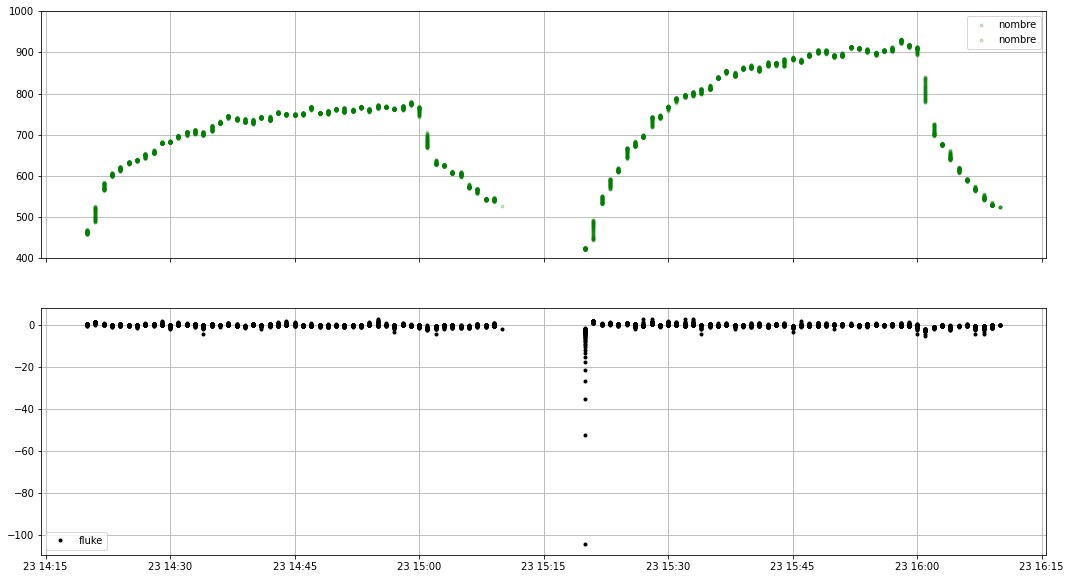

In [3]:
archivo = "../../data/fluke_23-07-2021_prueba700_800.csv"
fluke = analiza_fluke(archivo,intervalo="60S")

In [ ]:
fluke.plot(figsize=(10,4))